### Prob 2.2 ###
How does the softmax action selection method using the Gibbs distribution fare on the 10-armed bandit task? Implement the method and run it at several temperatures to produce graphs similar to those in Figure 2.1. To verify your code, first implement the $\epsilon$-greedy methods and reproduce some specific aspect of the results in Figure 2.1.

Initialized bandit with params:
Expected action values: [0, 1  , 2]
Standard deviations   : [1, 0.5, 3]
 


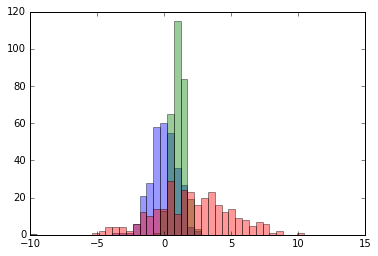

In [1]:
#-----------------------------------#
# Create a slot machine             #
#-----------------------------------#

# 10-armed bandit specification
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

class Gaussian_Bandit(object):
    """gaussian_bandit(n_arms, action_values) returns a callable n-armed gaussian bandit.

    Args:
        action_values (list): A list of action-value-expectations. 

    Returns:
        object: A gaussian_bandit object with the 'do_action' method.

    """
    def __init__(self, action_means, action_sdevs):
        self.action_means = action_means
        self.action_sdevs = action_sdevs
        self.n_arms       = len(action_means)
        
    def do_action(self, action_number):
        mu    = self.action_means[action_number]
        sigma = self.action_sdevs[action_number]
        return np.random.normal(mu, sigma)
        
a_bandit = Gaussian_Bandit([0, 1, 2],[1, 0.5, 3])

print('Initialized bandit with params:')
print('Expected action values: [0, 1  , 2]')
print('Standard deviations   : [1, 0.5, 3]')
print(' ')

#-----------------------------#
# Verify proper functionality #
#-----------------------------#
results = np.zeros([3,300])
for index in range(0,900):
    
    # Cycle through slots
    slot      = index % 3
    slot_iter = int(np.floor(index/3))
        
    results[slot, slot_iter] = a_bandit.do_action(slot)
    
# Plot results
bins = np.linspace(-10,15,50)
plt.hist(results[0,:], bins, alpha=0.4, label='0')
plt.hist(results[1,:], bins, alpha=0.4, label='0')
plt.hist(results[2,:], bins, alpha=0.4, label='0')

plt.show()

3

In [28]:
class Epsilon_Greedy_Learner(object):
    """Epsilon_Greedy_Learner returns a callable epsilon greedy learner with sample-average action value learning.
    
    Args:
        epsilon (real): Fraction of the time it chooses non-greedily.
        
    Returns:
        object: The learner.
    
    """
    def __init__(self, epsilon, n_actions):
        self.epsilon   = epsilon
        self.n_actions = n_actions
        
        # Init action values and action counters to zero
        self.learned_action_values  = [0] * n_actions
        self.count_of_actions_taken = [0] * n_actions
        
    def note_action_reward_pair(self, action, reward):
        count   = self.count_of_actions_taken[action]
        val_est = self.learned_action_values[action]
        
        new_est = val_est * count / (count + 1) + reward / (count + 1)
        
        self.learned_action_values[action]  = new_est
        self.count_of_actions_taken[action] = count + 1
        
    def select_action(self):
        val_ests    = self.learned_action_values
        be_greedy   = np.random.uniform() > self.epsilon
        best_action = val_ests.index(max(val_ests))
        
        if be_greedy:
            action_to_take = best_action
        else:            
            non_greedy_list = list(range(0, best_action)) + list(range(best_action+1, self.n_actions))
            action_selector = int( np.floor(np.random.uniform() * (self.n_actions-1)) )
            action_to_take  = non_greedy_list[action_selector]
            
        return action_to_take

Now we can create some bandits and learn how to play them optimally.

In [29]:
# Set up some easy bandits and a harder one
really_easy_bandit = Gaussian_Bandit([0, 3], [1, 1])
pretty_easy_bandit = Gaussian_Bandit([0, 1], [1, 1])

easyish_bandit = Gaussian_Bandit([0, 0.75, 1.5], [1, 1])
hardish_bandit = Gaussian_Bandit([0, 0.25, 0.5], [1, 1])


# Create some greedy learners
myopic_monkey = Epsilon_Greedy_Learner(0.05, 2)

# Give learners lifelike attributes
myopic_monkey.money = 10
myopic_monkey.time  = 20


# Monkey solvency function
def monkey_has_time_and_money(monkey):
    return monkey.money > 0 and monkey.time > 0


# Let's lern them bandits!
while monkey_has_time_and_money(myopic_monkey):
    
    action = myopic_monkey.select_action()
    reward = really_easy_bandit.do_action(action)
    
    myopic_monkey.time  = myopic_monkey.time  - 1
    myopic_monkey.money = myopic_monkey.money - 1 + reward
    
    myopic_monkey.note_action_reward_pair(action, reward)
    
    time  = myopic_monkey.time
    money = myopic_monkey.money
    print('Action: %d, Reward: % 3.2f, Money: % 4.2f, Time: %d' % (action, reward, money, time))
    


Action: 0, Reward: -0.23, Money:  8.77, Time: 19
Action: 1, Reward:  3.39, Money:  11.16, Time: 18
Action: 1, Reward:  1.99, Money:  12.15, Time: 17
Action: 1, Reward:  3.53, Money:  14.68, Time: 16
Action: 1, Reward:  3.18, Money:  16.86, Time: 15
Action: 1, Reward:  4.92, Money:  20.78, Time: 14
Action: 1, Reward:  3.02, Money:  22.80, Time: 13
Action: 1, Reward:  4.29, Money:  26.09, Time: 12
Action: 1, Reward:  2.96, Money:  28.06, Time: 11
Action: 1, Reward:  3.83, Money:  30.89, Time: 10
Action: 1, Reward:  1.52, Money:  31.41, Time: 9
Action: 1, Reward:  2.28, Money:  32.70, Time: 8
Action: 1, Reward:  1.98, Money:  33.67, Time: 7
Action: 1, Reward:  2.05, Money:  34.72, Time: 6
Action: 1, Reward:  2.33, Money:  36.05, Time: 5
Action: 1, Reward:  1.10, Money:  36.15, Time: 4
Action: 1, Reward:  4.08, Money:  39.23, Time: 3
Action: 0, Reward:  2.51, Money:  40.74, Time: 2
Action: 1, Reward:  1.87, Money:  41.61, Time: 1
Action: 1, Reward:  3.26, Money:  43.87, Time: 0
